# Lista 0

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Zadanie 1

### Podpunkt 1

In [15]:
df1 = pd.read_csv('data1.csv')

In [16]:
df1

,x1,x2,y
0,-9.632982,380.285723,-382.598729
1,60.908243,239.463394,-170.322897
2,-198.541302,62.397808,-252.646037
3,-420.984843,346.470458,-760.169653
4,5.043047,283.229031,-268.320209
...,...,...,...
95,-328.624808,358.886303,-680.164441
96,313.175011,253.240583,69.699882
97,-20.346170,139.683830,-151.625018
98,56.275054,358.844104,-295.829934


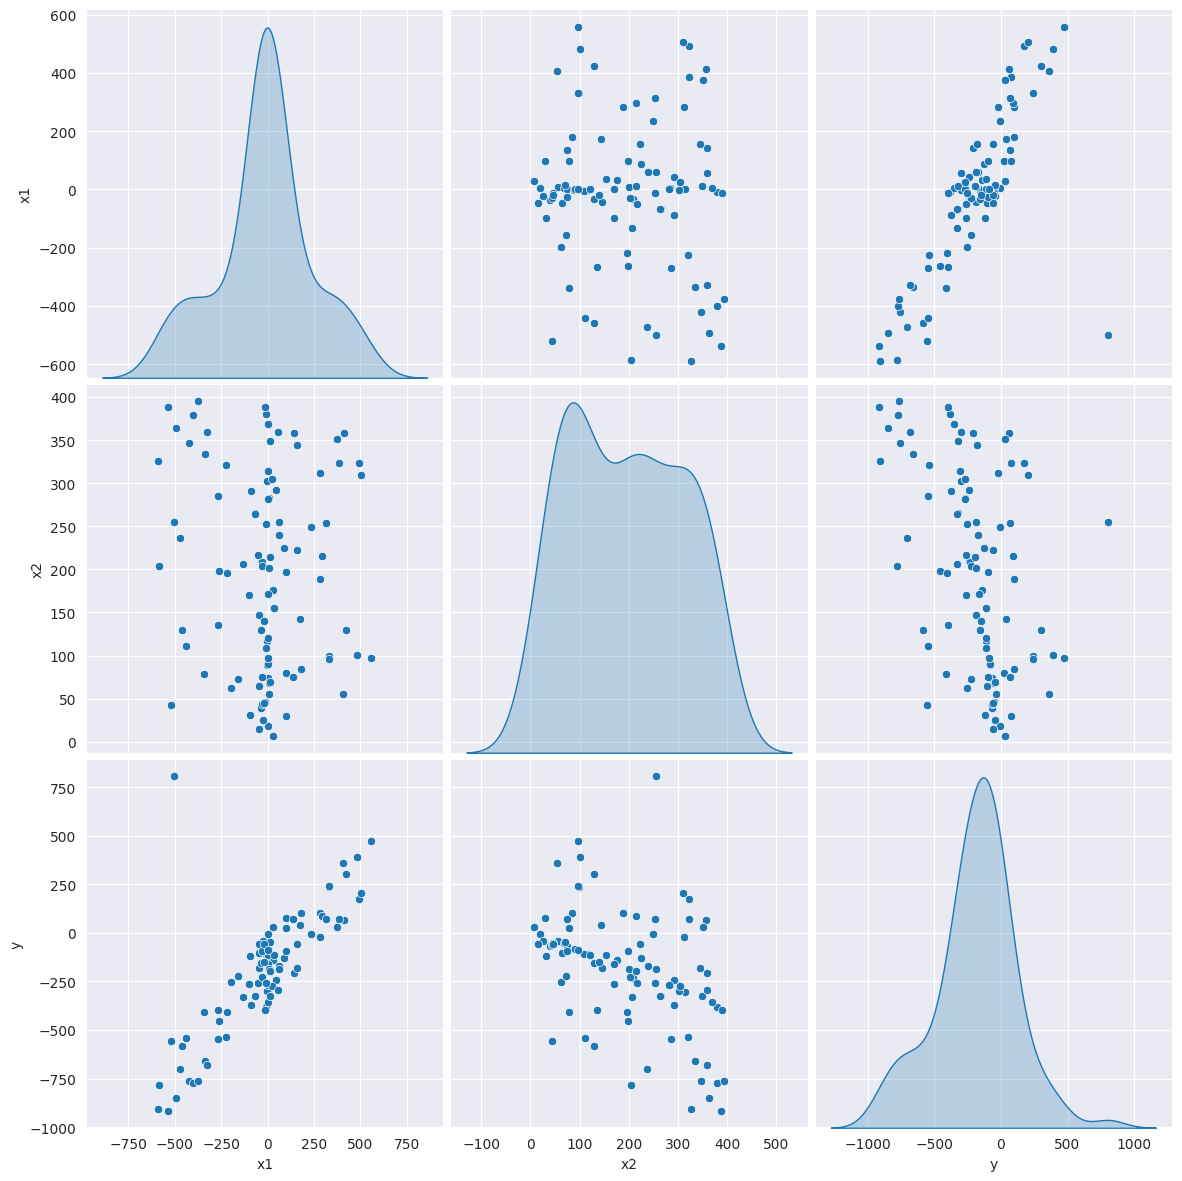

In [17]:
sns.pairplot(df1, diag_kind='kde', height=4)
plt.show()

<Axes: >

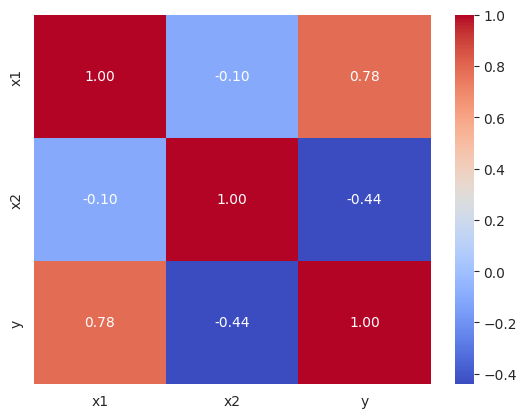

In [18]:
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")

x1 i y sa skorelowane mocno

x2 i y sa skorelowane troche

x1 i x2 nie sa skorelowane

### Podpunkt 2

In [19]:
def preprocess_data(X_train, y_train):
    X_train_scaled = (X_train - X_train.mean()) / np.std(X_train)
    #y_train_scaled = (y_train - y_train.mean()) / np.std(y_train)
    return X_train_scaled, y_train

In [20]:
xs, ys = preprocess_data(df1['x1'], df1['y'])

Najwieksza korelacja jest pomiedzy x1, a y, wiec zamierzam ich uzywac jako wejscia do modelu

## Zadanie 2

### Podpunkt 1

Wazne zeby uzyc funkcji preprocess data, po podziale. Inaczej dochodzi do wycieku danych. Wtedy liczymy srednia i odchylenie standardowe z calego zbioru. Przez do zbior testowy nie jest w 100% niezalezny od treningowego.


In [22]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df1['x1'].values.reshape(-1, 1), df1['y'].values.reshape(-1), test_size=0.2, random_state=42)

In [23]:
X_train, y_train = preprocess_data(X_train_raw, y_train_raw)
X_test, y_test = preprocess_data(X_test_raw, y_test_raw)

In [24]:
X_train.shape

(80, 1)

Dzielimy dane na 80/20 (trening/test). Funkcja train_test_split randomizuje skad bierze dane, co jest pozadane.

Nie, przy kilku modelach powinno sie uzywac kros-walidacji. Skad mamy miec pewnosc, ze to nie kwestia losowosci, ze akurat przy takim zbiorze treningowym i testowym model A jest lepszy od modelu B.
Dlatego powinno sie uzyc walidacji krzyzowej (K-fold cross-validation).

Dzielimy zbior danych na trening i test. Nastepnie dzielimy zbior treningowy na paczki (mniejsze zbiory treningowe). W i-tej iteracji wybieramy i-ta paczke jako zbior testowy, a trenujemy model na pozostalych. Przechodzac przez paczki, zostajemy z bledami modelu, ktore na koncu usredniamy. Dzieki temu mozemy porownywac bledy roznych modeli. Na sam koniec uzywamy zbioru testowego aby przetestowac lepszy model.

### Podpunkt 2

Srednia jako model baseline

### Podpunkt 3

In [25]:
def lr_predict(X_train, y_train, X_test):
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [26]:
predicted_raw = lr_predict(X_train_raw, y_train_raw, X_test_raw)

baseline_raw = y_train_raw.mean()

In [27]:
predicted_pre = lr_predict(X_train, y_train, X_test)

baseline_pre = y_train.mean()

### Podpunkt 4

In [28]:
mse_base_raw = mean_squared_error(predicted_raw, y_test_raw)
mse_base_pre = mean_squared_error(predicted_pre, y_test)

mse_model_raw = mean_squared_error(np.full_like(y_test_raw, baseline_raw), y_test_raw)
mse_model_pre = mean_squared_error(np.full_like(y_test, baseline_pre), y_test)

In [29]:
pd.DataFrame(
    {'mse': [mse_base_raw, mse_model_raw, mse_base_pre, mse_model_pre]},
    index=['baseline raw', 'linear raw', 'baseline normalized', 'linear normalized']
)

,mse
baseline raw,13685.973583
linear raw,70092.425271
baseline normalized,12800.441716
linear normalized,70092.425271


### Podpunkt 5

## Zadanie 3

### Podpunkt 1

In [30]:
df3 = pd.read_csv('advertising.csv')

In [31]:
df3

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


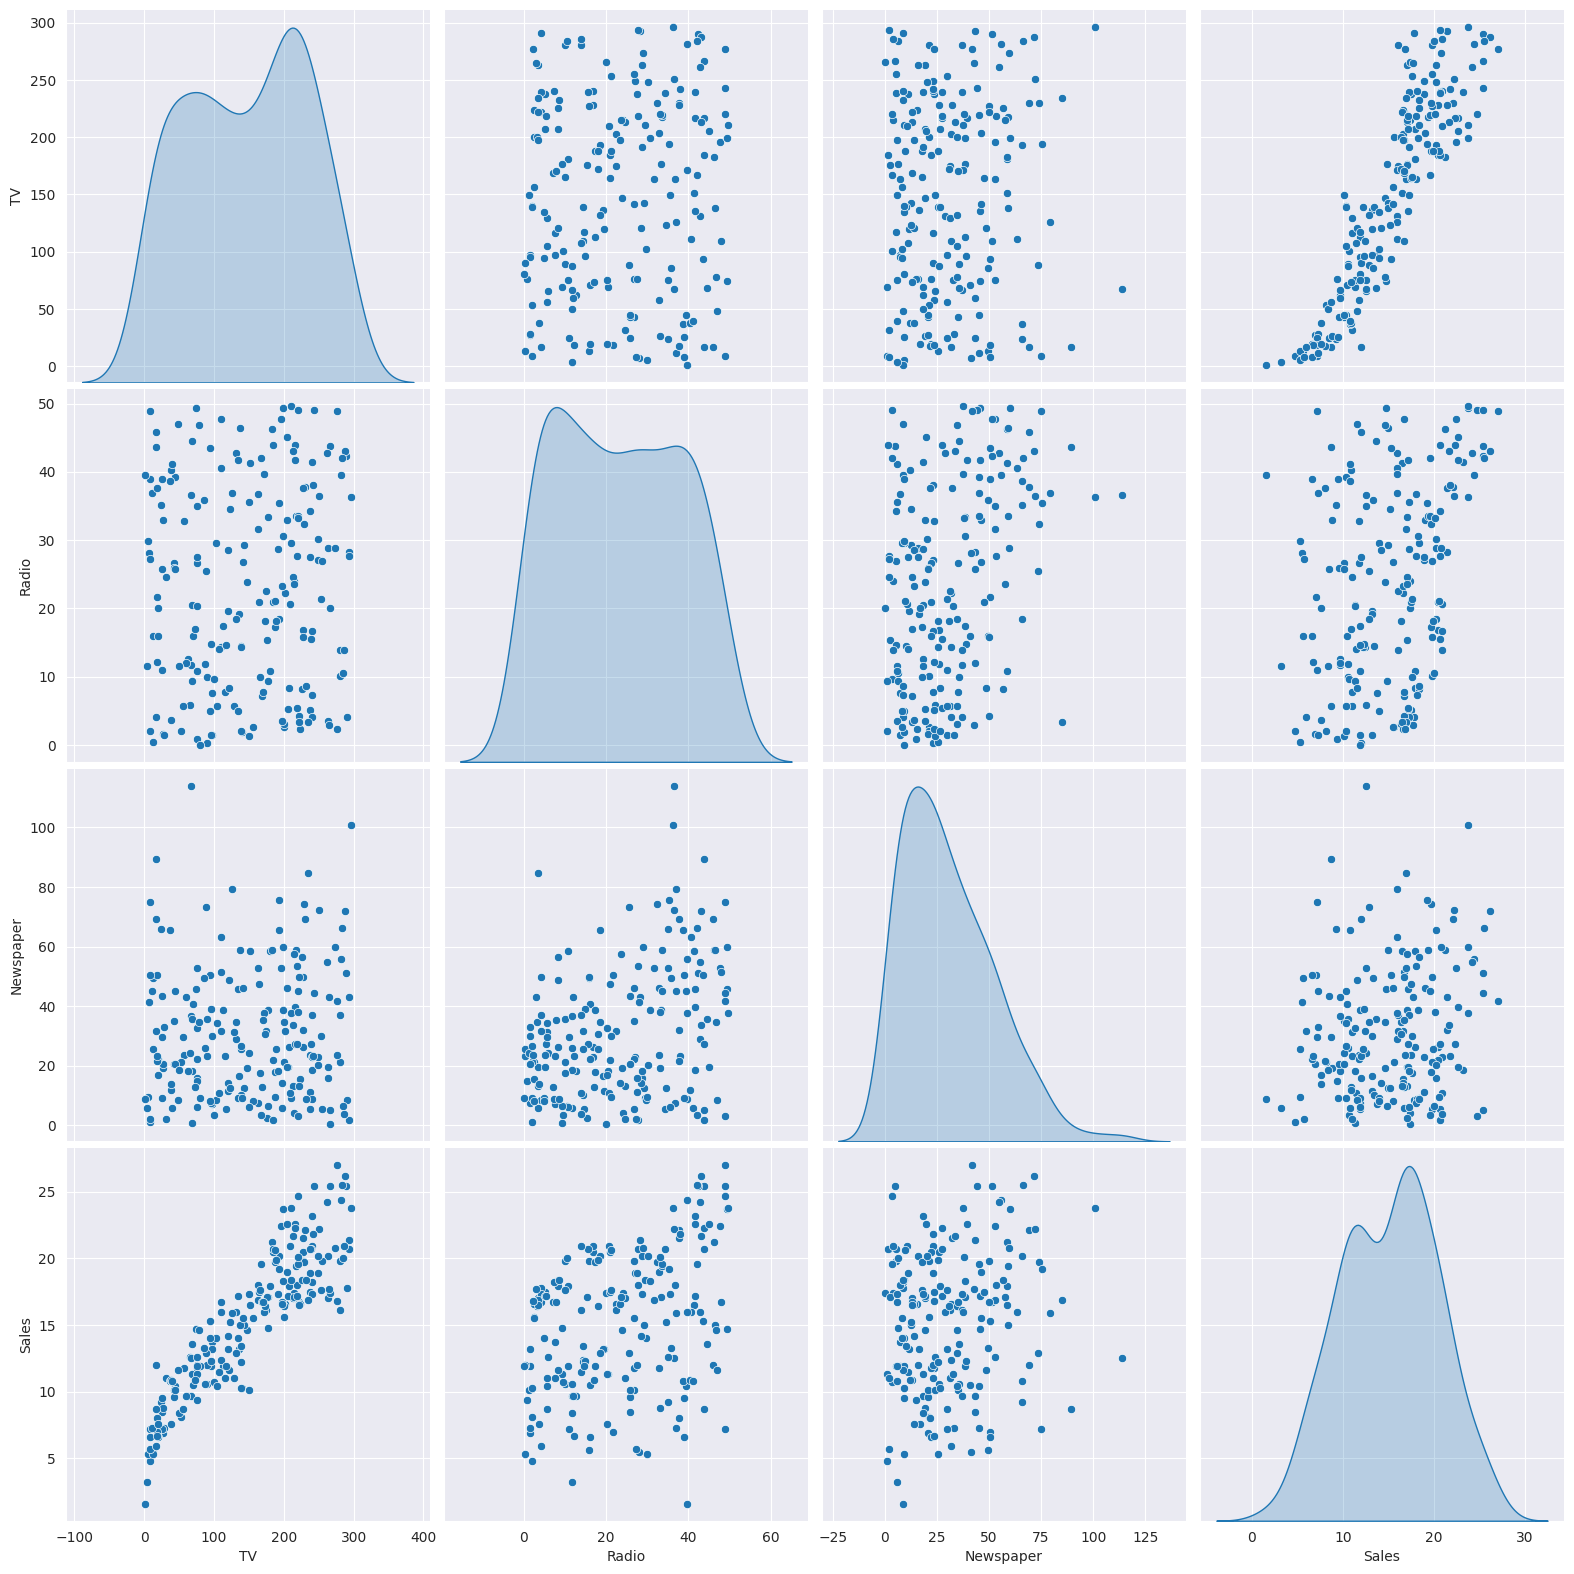

In [32]:
sns.pairplot(df3, diag_kind='kde', height=4)

<Axes: >

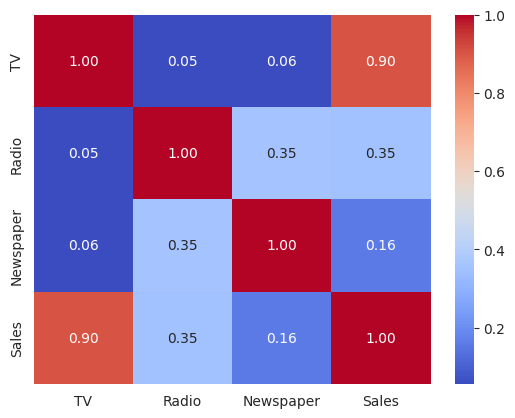

In [33]:
sns.heatmap(df3.corr(), annot=True, fmt=".2f", cmap="coolwarm")

Zmienne Sales i TV sa mocno skorelowane. Reszta slabo lub w ogole.

### Podpunkt 2

In [34]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df3['TV'].values.reshape(-1, 1), df3['Sales'].values.reshape(-1), test_size=0.2, random_state=42)

In [35]:
X_train, y_train = preprocess_data(X_train_raw, y_train_raw)
X_test, y_test = preprocess_data(X_test_raw, y_test_raw)

In [36]:
predicted_raw = lr_predict(X_train_raw, y_train_raw, X_test_raw)
predicted_pre = lr_predict(X_train, y_train, X_test)

### Podpunkt 3

In [37]:
mse_model_raw = mean_squared_error(np.full_like(y_test_raw, baseline_raw), y_test_raw)
mse_model_pre = mean_squared_error(np.full_like(y_test, baseline_pre), y_test)

In [50]:
pd.DataFrame(
    {'mse': [mse_model_raw, mse_model_pre]},
    index=['linear raw', 'linear normalized']
)

,mse
linear raw,45103.25563
linear normalized,45103.25563


Model z znormalizowanymi wartosciami ma o wiele mniejsze MSE.

Mniejsze MSE zazwyczaj oznacza, ze model jest lepszy.


### Podpunkt 4

## Zadanie 4

### Podpunkt 1

In [39]:
df4 = pd.read_csv('data4.csv')

In [40]:
df4

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,-0.922165,1.876796,0.756989,0.279969,0.725767,0.481009,1.355638,-1.244655,0.413435,0.869606,...,-1.125489,2.445752,0.129221,0.223884,1.496044,-0.773789,-0.055585,0.109395,-1.778720,97.037387
1,0.579291,-0.158530,-0.015310,-1.371901,1.039905,-0.605616,-0.973069,-0.933268,1.196571,0.119580,...,-1.613561,1.471170,-0.209324,1.826010,-0.884803,-0.027305,1.711708,-0.669073,-0.443282,95.197140
2,0.872457,-1.070085,-1.280304,-1.251539,0.456753,0.569767,-0.099176,-0.691908,1.846637,0.650201,...,1.443765,-0.082151,1.117296,0.447709,0.243339,-1.525525,0.352055,0.342725,-0.045586,124.622067
3,-0.487911,0.299293,0.677926,2.013387,-0.971614,1.200414,-0.605715,1.561511,0.742095,2.157308,...,0.136535,-0.365322,0.184680,-0.656894,-0.753418,1.301741,-0.677715,-1.347126,0.032004,153.568594
4,1.532739,-0.401220,0.519347,1.451144,0.183342,2.189803,0.401712,0.012592,0.690144,-0.108760,...,0.959271,2.153182,-0.767348,-0.808298,-0.773010,0.224092,0.497998,0.872321,0.097676,72.297603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.152470,-1.331233,0.133541,-0.006071,-0.290275,0.267392,0.956702,0.507991,-0.785989,0.708109,...,0.838491,0.081829,-0.098890,0.321698,-2.152891,-1.836205,2.493000,0.919076,-1.103367,-8.089065
96,-0.391649,-0.369610,0.308051,-0.905732,3.137749,1.056057,-0.343192,-0.029263,0.621572,0.269127,...,-0.653766,-0.595661,1.374438,0.223239,-0.051394,0.377100,1.261921,-2.135674,1.126050,73.872254
97,-2.848543,-1.119670,0.771699,0.076822,-0.428115,1.500760,-1.739714,1.160827,-0.362441,1.148766,...,-1.282992,0.996267,-0.493757,0.850222,0.346504,-1.294681,0.477041,-1.556582,-0.467701,-3.695159
98,-1.129707,-0.796895,0.835692,1.167782,-0.432558,0.394452,1.441569,-0.203045,-2.471645,0.529804,...,0.254421,0.337603,-0.411877,-0.420984,-0.603985,0.577072,-0.155677,-0.487606,0.371146,-128.683730


<Axes: >

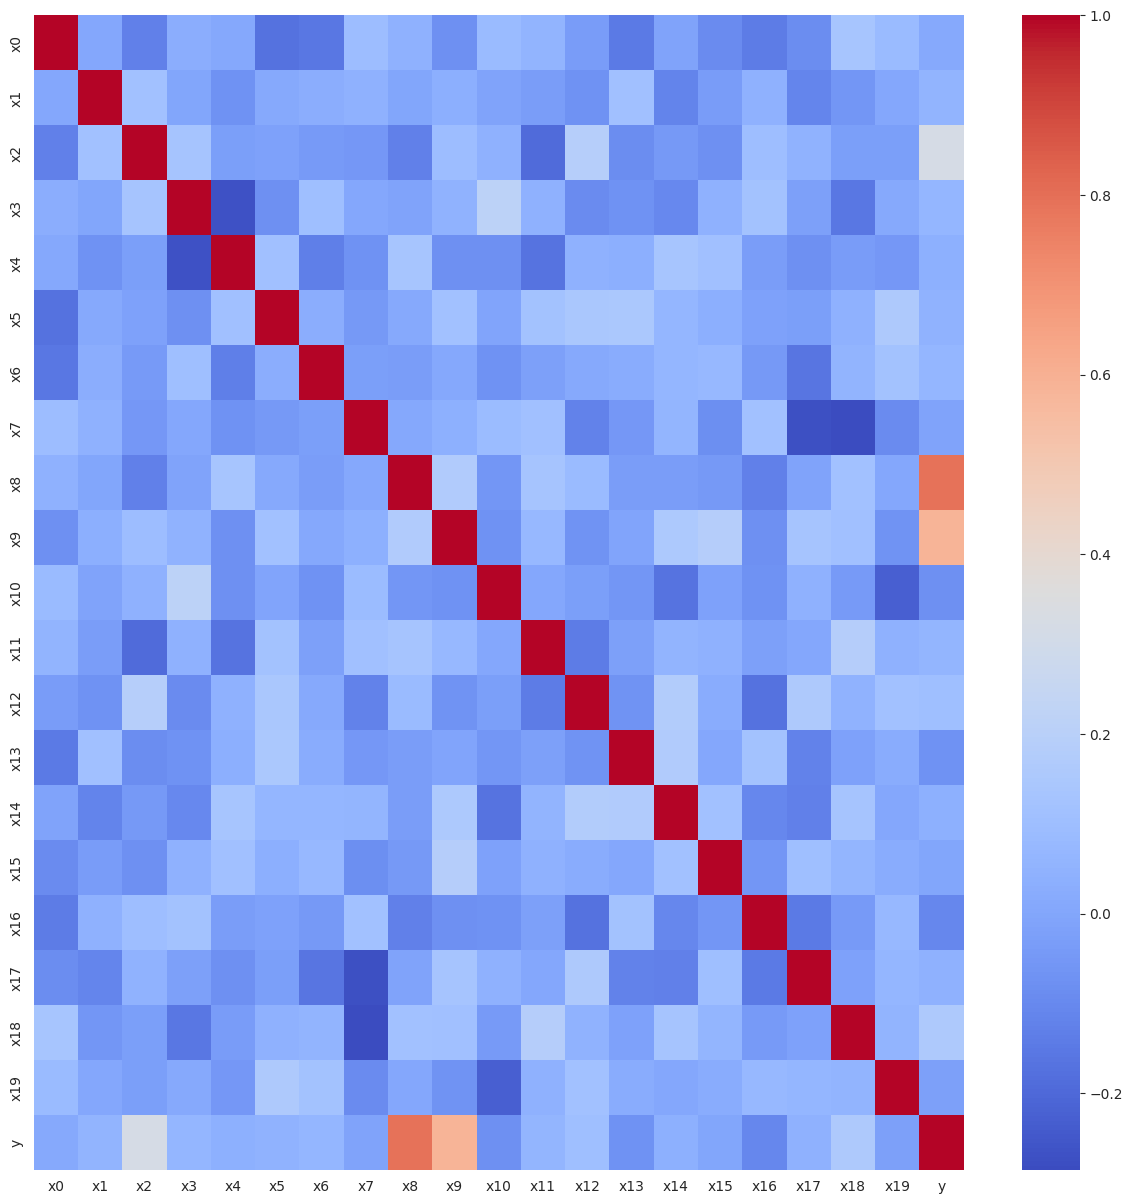

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df4.corr(), cmap="coolwarm")


In [42]:
df4.corr()['y']

x0     0.011124
x1     0.053079
x2     0.319306
x3     0.061839
x4     0.036706
x5     0.046841
x6     0.061951
x7    -0.011481
x8     0.791969
x9     0.583381
x10   -0.079549
x11    0.058697
x12    0.102124
x13   -0.070079
x14    0.038171
x15   -0.000139
x16   -0.106036
x17    0.041417
x18    0.157091
x19   -0.022020
y      1.000000
Name: y, dtype: float64

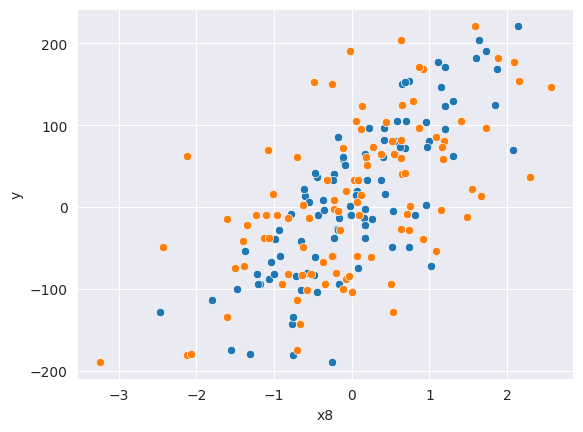

In [43]:
sns.scatterplot(df4, x='x8', y='y')
sns.scatterplot(df4, x='x9', y='y')
plt.show()

Uzywam wykresu aby zobaczyc zaleznosci, a potem szukam wartosci

x8 i y -> 0.79

x9 i y -> 0.58

### Podpunkt 2

In [61]:
df4[['x8', 'x9']]

,x8,x9
0,0.413435,0.869606
1,1.196571,0.119580
2,1.846637,0.650201
3,0.742095,2.157308
4,0.690144,-0.108760
...,...,...
95,-0.785989,0.708109
96,0.621572,0.269127
97,-0.362441,1.148766
98,-2.471645,0.529804


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df4[['x8', 'x9']].values.reshape(-1, 2), df4['y'].values.reshape(-1), test_size=0.2, random_state=42)
X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

In [63]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

predicted = model.predict(X_test)

Przetestowalem recznie rozne alfy od (0.01 do 10) i 0.01 dala mi najlepszy wynik.

Wybieram alfe 1. Jestem swiadomy, ze jest gorsza (mse 1820 vs 1831), ale za to model bedzie bardziej zgeneralizowany. Przez to gdy dostaniemy nowe dane na pracowni jest szansa na lepszy wynik.

In [82]:
modelL2 = linear_model.Ridge(alpha=1)
modelL2.fit(X_train, y_train)

predictedL2 = modelL2.predict(X_test)

### Podpunkt 3

In [83]:
mse = mean_squared_error(y_test, predicted)
mseL2 = mean_squared_error(y_test, predictedL2)

In [87]:
pd.DataFrame(
    {'mse': [mse, mseL2],
     'coef': [model.coef_[0], modelL2.coef_[0]],
     'coef2': [model.coef_[1], modelL2.coef_[1]],
     'intercept': [model.intercept_, modelL2.intercept_]},
     index=['normal', 'L2']
)

,mse,coef,coef2,intercept
normal,1820.486130,70.366642,41.499160,10.509452
L2,1831.129775,69.458908,41.223835,10.494427


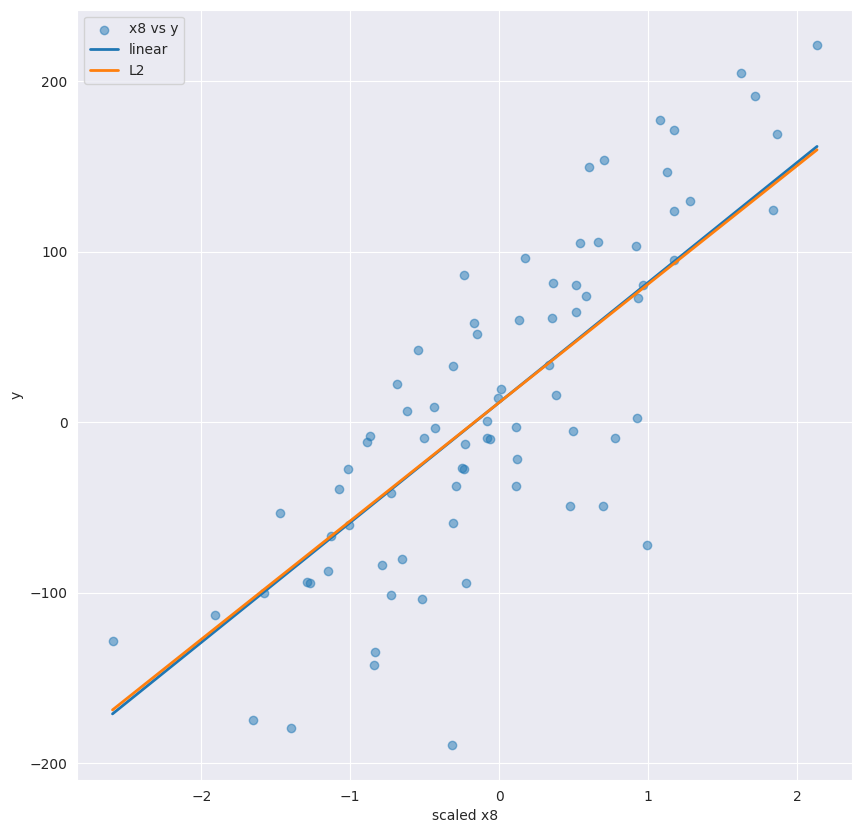

In [88]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], y_train, alpha=0.5, label='x8 vs y')
plt.ylabel('y')
plt.xlabel('scaled x8')

X_line = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

x9_mean = X_train[:, 1].mean()
Y1 = model.coef_[0] * X_line + model.coef_[1] * x9_mean + model.intercept_
Y2 = modelL2.coef_[0] * X_line + modelL2.coef_[1] * x9_mean + modelL2.intercept_

plt.plot(X_line, Y1, label='linear', linewidth=2)
plt.plot(X_line, Y2, label='L2', linewidth=2)

plt.legend()
plt.show()

Model z regularyzacja L2 (kara za duze wspolczynniki modelu) ma wieksze MSE. Pewnie dlatego, ze regularyzacja dziala i stara sie minimalizowac wagi, kosztem gorszego wyniku.

Zwykly model mogl sie dostosowywac do szumu(odstajacych punktow), przez co jego dzialanie bedzie mniej zgeneralizowane.

Wspolczynniki w modelu z regularyzacja jest mniejszy co pokazuje dzialanie regularyzacji.

W teorii lepiej wypadl model bez regularyzacji. Bardziej sie dopasowal do danych i nie byl za to karany dodatkowo.

### Podpunkt 4

# Dyskusja na pracownie

Poznalem pairplot, kdeplot (kernel density estimate), K-fold cross-validation, L2 regularyzacja (Ridge)